In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Resize, Compose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import PIL 
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sb


# A) combining

## part 1

In [3]:
from mergeImageTextNetwork import mergeImageTextNetwork
mergeNet = mergeImageTextNetwork()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
mergeNet.faceDataset(root_dir='.', mode='train')
mergeNet.faceDataset(root_dir='.', mode='validation')
mergeNet.faceDataset(root_dir='.', mode='test')

In [6]:
mergeNet.train(epochs=30, lr=1e-3, modelPath_pred='checkpoints/textimageClassifier.pth')

 Epoch 1 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.15it/s]


 -Training Accuracy (Avg) = 38.4%, loss = 1.090282 



100%|██████████| 147/147 [00:09<00:00, 15.55it/s]


 - evaluation Accuracy = 42.9%, loss = 1.092354 

save model in checkpoints/textimageClassifier.pth
 Epoch 2 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.78it/s]


 -Training Accuracy (Avg) = 39.3%, loss = 1.087035 



100%|██████████| 147/147 [00:09<00:00, 15.47it/s]


 - evaluation Accuracy = 43.3%, loss = 1.091937 

save model in checkpoints/textimageClassifier.pth
 Epoch 3 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 39.6%, loss = 1.085862 



100%|██████████| 147/147 [00:09<00:00, 15.37it/s]


 - evaluation Accuracy = 43.2%, loss = 1.083914 

 Epoch 4 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.74it/s]


 -Training Accuracy (Avg) = 39.5%, loss = 1.082960 



100%|██████████| 147/147 [00:09<00:00, 15.45it/s]


 - evaluation Accuracy = 42.4%, loss = 1.080151 

 Epoch 5 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.19it/s]


 -Training Accuracy (Avg) = 44.0%, loss = 1.052160 



100%|██████████| 147/147 [00:09<00:00, 15.43it/s]


 - evaluation Accuracy = 54.3%, loss = 0.995801 

save model in checkpoints/textimageClassifier.pth
 Epoch 6 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 57.7%, loss = 0.920880 



100%|██████████| 147/147 [00:09<00:00, 15.33it/s]


 - evaluation Accuracy = 58.4%, loss = 0.920285 

save model in checkpoints/textimageClassifier.pth
 Epoch 7 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.57it/s]


 -Training Accuracy (Avg) = 59.3%, loss = 0.886460 



100%|██████████| 147/147 [00:09<00:00, 15.62it/s]


 - evaluation Accuracy = 57.9%, loss = 0.925785 

 Epoch 8 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.60it/s]


 -Training Accuracy (Avg) = 59.7%, loss = 0.880678 



100%|██████████| 147/147 [00:09<00:00, 15.56it/s]


 - evaluation Accuracy = 57.7%, loss = 0.924071 

 Epoch 9 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.61it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.878250 



100%|██████████| 147/147 [00:09<00:00, 15.43it/s]


 - evaluation Accuracy = 58.9%, loss = 0.910060 

save model in checkpoints/textimageClassifier.pth
 Epoch 10 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.62it/s]


 -Training Accuracy (Avg) = 60.0%, loss = 0.876379 



100%|██████████| 147/147 [00:09<00:00, 15.55it/s]


 - evaluation Accuracy = 59.5%, loss = 0.904431 

save model in checkpoints/textimageClassifier.pth
 Epoch 11 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.42it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.876255 



100%|██████████| 147/147 [00:09<00:00, 15.33it/s]


 - evaluation Accuracy = 59.6%, loss = 0.900992 

save model in checkpoints/textimageClassifier.pth
 Epoch 12 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874429 



100%|██████████| 147/147 [00:09<00:00, 15.79it/s]


 - evaluation Accuracy = 58.5%, loss = 0.911661 

 Epoch 13 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874143 



100%|██████████| 147/147 [00:09<00:00, 15.62it/s]


 - evaluation Accuracy = 58.5%, loss = 0.915889 

 Epoch 14 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.79it/s]


 -Training Accuracy (Avg) = 60.4%, loss = 0.873247 



100%|██████████| 147/147 [00:09<00:00, 15.37it/s]


 - evaluation Accuracy = 59.6%, loss = 0.903228 

 Epoch 15 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.873484 



100%|██████████| 147/147 [00:09<00:00, 15.67it/s]


 - evaluation Accuracy = 59.0%, loss = 0.909097 

 Epoch 16 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.70it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873121 



100%|██████████| 147/147 [00:09<00:00, 15.45it/s]


 - evaluation Accuracy = 59.1%, loss = 0.908026 

 Epoch 17 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.73it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873241 



100%|██████████| 147/147 [00:09<00:00, 15.65it/s]


 - evaluation Accuracy = 59.0%, loss = 0.909073 

 Epoch 18 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.80it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.873508 



100%|██████████| 147/147 [00:09<00:00, 15.79it/s]


 - evaluation Accuracy = 59.2%, loss = 0.908309 

 Epoch 19 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873050 



100%|██████████| 147/147 [00:09<00:00, 15.87it/s]


 - evaluation Accuracy = 58.8%, loss = 0.909740 

 Epoch 20 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.32it/s]


 -Training Accuracy (Avg) = 60.0%, loss = 0.873718 



100%|██████████| 147/147 [00:09<00:00, 15.22it/s]


 - evaluation Accuracy = 59.4%, loss = 0.907191 

 Epoch 21 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874373 



100%|██████████| 147/147 [00:09<00:00, 15.53it/s]


 - evaluation Accuracy = 58.2%, loss = 0.914645 

 Epoch 22 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.66it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874407 



100%|██████████| 147/147 [00:09<00:00, 15.58it/s]


 - evaluation Accuracy = 59.1%, loss = 0.910624 

 Epoch 23 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.67it/s]


 -Training Accuracy (Avg) = 60.5%, loss = 0.874083 



100%|██████████| 147/147 [00:09<00:00, 15.64it/s]


 - evaluation Accuracy = 59.1%, loss = 0.912531 

 Epoch 24 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.61it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874710 



100%|██████████| 147/147 [00:09<00:00, 15.29it/s]


 - evaluation Accuracy = 59.1%, loss = 0.908679 

 Epoch 25 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.875067 



100%|██████████| 147/147 [00:09<00:00, 15.70it/s]


 - evaluation Accuracy = 58.3%, loss = 0.924203 

 Epoch 26 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.75it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874903 



100%|██████████| 147/147 [00:09<00:00, 15.76it/s]


 - evaluation Accuracy = 59.2%, loss = 0.909131 

 Epoch 27 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.65it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.875366 



100%|██████████| 147/147 [00:09<00:00, 15.58it/s]


 - evaluation Accuracy = 59.5%, loss = 0.897737 

 Epoch 28 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.77it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.875553 



100%|██████████| 147/147 [00:09<00:00, 15.48it/s]


 - evaluation Accuracy = 57.2%, loss = 0.935151 

 Epoch 29 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.80it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.875651 



100%|██████████| 147/147 [00:09<00:00, 15.68it/s]


 - evaluation Accuracy = 60.3%, loss = 0.894073 

save model in checkpoints/textimageClassifier.pth
 Epoch 30 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.76it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874968 



100%|██████████| 147/147 [00:09<00:00, 15.46it/s]

 - evaluation Accuracy = 58.6%, loss = 0.907920 



In [7]:
# test model with test dataset
y_true, y_pred,_ = mergeNet.eval(test_flag=True)

100%|██████████| 147/147 [00:09<00:00, 15.34it/s]

 - evaluation Accuracy = 58.8%, loss = 0.909211 



In [8]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.44      0.54      0.48      1165
    negative       0.68      0.65      0.67      2032
    positive       0.62      0.54      0.58      1486

    accuracy                           0.59      4683
   macro avg       0.58      0.58      0.57      4683
weighted avg       0.60      0.59      0.59      4683



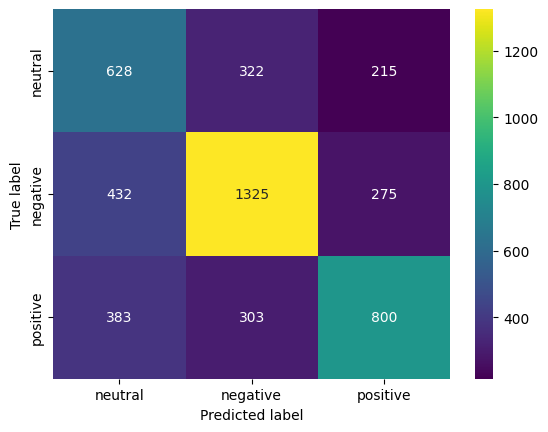

In [9]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> **Best train Accuracy** = `60.1%`\
> **Best Validation Accuracy** = `60.3%`\
> **test Accuracy** = `59%`

# B) Weakly Supervised Learning

## 1) use validation as domain

In [90]:
from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Resize, Compose
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os

from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
import torchtext
from torchvision.transforms import ToTensor, Resize, Compose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [91]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [92]:
transforms = Compose([resize(dstsize=(224,224))])

root_dir = '.'

training_data = MSCTD(
        mode='train', 
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

valid_data = MSCTD(
        mode='validation',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

test_data = MSCTD(
        mode='test',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

In [93]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

### BERT as Text Classifier

In [94]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

In [95]:
import torch

class MSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [96]:
from transformers import AutoModel, AdamW
from torch import nn

class TextClassifier(nn.Module):
  def __init__(self):
    super(TextClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('bert-base-uncased')
    self.fc1 = nn.Linear(768, 512)
    self.fc2 = nn.Linear(512, 64)
    self.fc3 = nn.Linear(64, 3)
    self.activation = nn.ReLU()
  
  def forward(self, input_ids, attention_mask):
    bert = self.bert(input_ids, attention_mask=attention_mask)[1]
    fc1 = self.fc1(bert)
    fc1 = self.activation(fc1)
    fc2 = self.fc2(fc1)
    fc2 = self.activation(fc2)
    fc3 = self.fc3(fc2)
    return fc3

In [97]:
pre_trained_path = 'checkpoints/bert.pth'
state_dict = torch.load(pre_trained_path, map_location=torch.device('cpu'))
text_model = TextClassifier()
text_model.load_state_dict(state_dict)
text_model.requires_grad_(False)
text_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TextClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

### Image Classifier 

In [98]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_relu_stack = nn.Sequential(

            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(16, 3),
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [99]:
from faceAnalysis.networks.dan import DAN

pre_trained_path = 'checkpoints/faceDAN_aug.pth'
pip_model = torch.load(pre_trained_path)
image_model = DAN(num_head=4, num_class=3,pretrained=False)
image_model.load_state_dict(pip_model['model_state_dict'])
image_model.requires_grad_(False)
image_model.to(device)

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DAN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [100]:
# image_model = resnet50(weights=ResNet50_Weights.DEFAULT)
# image_model.fc = MLP()

# pre_trained_path = 'checkpoints/imageResNet50.pth'
# state_dict = torch.load(pre_trained_path, map_location=torch.device('cpu'))
# image_model.load_state_dict(state_dict)
# image_model.requires_grad_(False)
# image_model.to(device)

In [101]:
for param in image_model.parameters():
    param.requires_grad = False

for name, param in image_model.named_parameters():
     if 'fc' in name:
         param.requires_grad = True

for name, param in image_model.named_parameters():
    print(name, param.requires_grad)

features.0.weight False
features.1.weight False
features.1.bias False
features.4.0.conv1.weight False
features.4.0.bn1.weight False
features.4.0.bn1.bias False
features.4.0.conv2.weight False
features.4.0.bn2.weight False
features.4.0.bn2.bias False
features.4.1.conv1.weight False
features.4.1.bn1.weight False
features.4.1.bn1.bias False
features.4.1.conv2.weight False
features.4.1.bn2.weight False
features.4.1.bn2.bias False
features.5.0.conv1.weight False
features.5.0.bn1.weight False
features.5.0.bn1.bias False
features.5.0.conv2.weight False
features.5.0.bn2.weight False
features.5.0.bn2.bias False
features.5.0.downsample.0.weight False
features.5.0.downsample.1.weight False
features.5.0.downsample.1.bias False
features.5.1.conv1.weight False
features.5.1.bn1.weight False
features.5.1.bn1.bias False
features.5.1.conv2.weight False
features.5.1.bn2.weight False
features.5.1.bn2.bias False
features.6.0.conv1.weight False
features.6.0.bn1.weight False
features.6.0.bn1.bias False
featu

In [102]:
learning_rate = 1e-4
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(image_model.parameters(), lr=learning_rate)

In [111]:
from torch.utils.data import DataLoader
from tqdm import tqdm

def train_loop(dataloader, image_model, text_model ,loss_fn, optimizer,tokenizer, MSDataset):
    size = len(dataloader.dataset)
    image_model.train()
    text_model.eval()
    for i, (X, text, label, temp2) in enumerate(tqdm(dataloader)): 
        # Compute prediction and loss 
        X = torch.permute(X[0],(0,3,1,2)).float()
        X = X.to(device)
        
        
        text = list(text[0])
        valid_encodings = tokenizer(text, truncation=True, padding=True, max_length=512)
        label = torch.squeeze(torch.Tensor(np.array(label).astype(int)).to(torch.long))
        label = label.tolist()
        
        valid_dataset = MSDataset(valid_encodings, label)
        valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
        for batch in valid_loader:

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = text_model(input_ids, attention_mask=attention_mask)
            outputs = outputs.to(device)
            
        
        pred,_,_ = image_model(X)      
        y = outputs.argmax(1) 
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  
    print(f"loss: {loss.item():>7f}")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for (X, temp1, y, temp2) in dataloader:
            X = torch.permute(X[0],(0,3,1,2)).float()
            X = X.to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long)) ###
            y = y.to(device)
            pred,_,_ = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"\nTest Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [112]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(valid_dataloader, image_model, text_model, loss_fn, optimizer, tokenizer, MSDataset)
    test_loop(test_dataloader, image_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


  1%|▏         | 1/80 [00:00<00:37,  2.13it/s]

loss: 1.044797  [    0/ 5063]


100%|██████████| 80/80 [00:31<00:00,  2.57it/s]


Test Error: 
 Accuracy: 42.5%, Avg loss: 0.017213 

Epoch 2
-------------------------------


  1%|▏         | 1/80 [00:00<00:31,  2.54it/s]

loss: 1.016877  [    0/ 5063]


 10%|█         | 8/80 [00:03<00:29,  2.42it/s]


KeyboardInterrupt: 

In [106]:
y_pred = []
y_true = []
image_model.eval()
with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        X = torch.permute(X[0],(0,3,1,2)).float()
        X = X.to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred,_,_ = image_model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [107]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.26      0.02      0.04      1298
    negative       0.43      0.98      0.60      2163
    positive       0.00      0.00      0.00      1606

    accuracy                           0.42      5067
   macro avg       0.23      0.33      0.21      5067
weighted avg       0.25      0.42      0.27      5067



/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


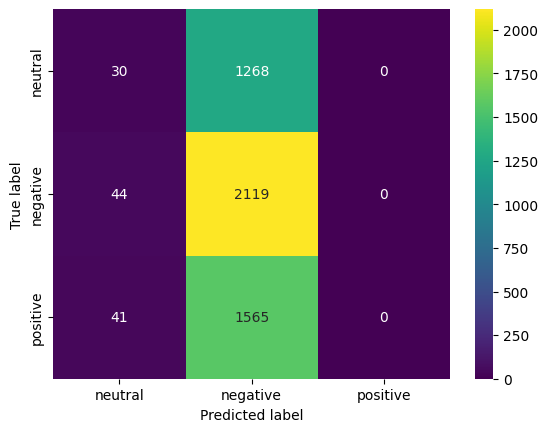

In [108]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()